## Model Training

#### Import Packages

In [3]:
# Basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import warnings

# Modelling
from sklearn.svm import SVR
# from xgboot import XGBRegressor
# from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Import Dataset

In [4]:
df = pd.read_csv('./data/StudentsPerformance.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Preparing X and Y variables

In [6]:
X = df.drop(columns='math score', axis=1)

In [7]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
X.shape

(1000, 7)

In [9]:
print('Categories in "gender" variable: {}'.format(df['gender'].unique()))

print('Categories in "race/ethnicity" variable: {}'.format(df['race/ethnicity'].unique()))

print('Categories in "parental level of education" variable: {}'.format(df['parental level of education'].unique()))

print('Categories in "lunch" variable: {}'.format(df['lunch'].unique()))

print('Categories in "test preparation course" variable: {}'.format(df['test preparation course'].unique()))

Categories in "gender" variable: ['female' 'male']
Categories in "race/ethnicity" variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental level of education" variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable: ['standard' 'free/reduced']
Categories in "test preparation course" variable: ['none' 'completed']


In [10]:
y = df['math score']

In [11]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [12]:
# Create column tranformer with 3 types of transformers
numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', encoder, categorical_features),
        ('StandardScaler', scaler, numeric_features)
    ]
)

In [13]:
X = preprocessor.fit_transform(X) 

In [14]:
X.shape

(1000, 19)

#### Split data into train and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape    

((800, 19), (200, 19))

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    # Model Training
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    # Evaluate train and test data
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3368
- Mean Absolute Error: 4.2821
- R2 Score: 0.8737
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3375
- Mean Absolute Error: 4.1775
- R2 Score: 0.8829
Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


In [28]:
columns = ['Model Name', 'R2_Score']
data = list(zip(model_list, r2_list))

pd.DataFrame(data, columns=columns).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.882925
2,Ridge,0.880593
1,Lasso,0.825320


In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.29


Text(0, 0.5, 'Predicted')

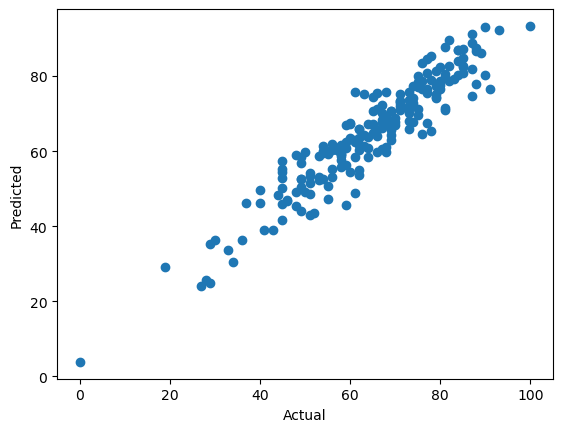

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<AxesSubplot: xlabel='math score'>

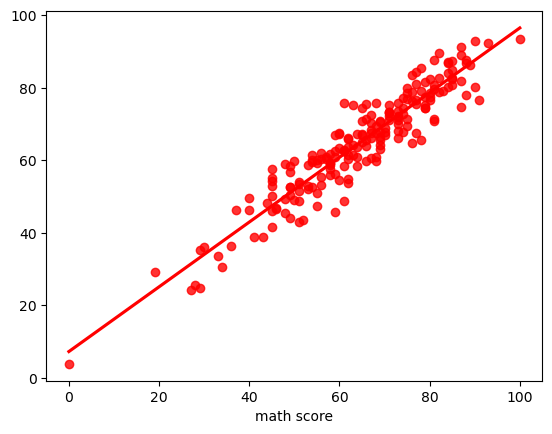

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [34]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

,Actual Value,Predicted Value,Difference
521,91,76.6250,14.3750
737,53,58.6875,-5.6875
740,80,77.5000,2.5000
660,74,77.2500,-3.2500
411,84,87.0625,-3.0625
...,...,...,...
408,52,43.5000,8.5000
332,62,61.5625,0.4375
208,74,67.6875,6.3125
613,65,67.2500,-2.2500
